In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler

# import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}'
# mpl.rc('font', family='serif')

In [2]:
data = pd.read_csv("save/a_star/Anygrad (m=10000).csv", sep=";")
data.rename(columns={"t1": r"$t_1$", "t_switch": r"$t_switch$",
                     "total_iterations": r"$\sum M$", "total_time": "T",
                     "derivation_1st": r"$d_1$", "derivation_2nd": r"$d_2$"}, inplace=True)
print(data)

       rep  round  context_change     target  value   m      M  $\sum M$  \
0        0      0               0   Target 1    NaN   0      0         0   
1        0      0               0   Target 2    NaN   0      0         0   
2        0      0               0   Target 3    NaN   0      0         0   
3        0      0               0   Target 4    NaN   0      0         0   
4        0      0               0   Target 5    NaN   0      0         0   
...    ...    ...             ...        ...    ...  ..    ...       ...   
30755    0    605            3075   Target 6   20.0  30  10680    106458   
30756    0    605            3075   Target 7   20.0  30  10577    106458   
30757    0    605            3075   Target 8   22.0  30  10645    106458   
30758    0    605            3075   Target 9   23.0  32  10586    106458   
30759    0    605            3075  Target 10   23.0  26  10720    106458   

                T  time_on_target  $t_switch$     $t_1$         $d_1$  \
0        0.000

In [3]:
def performance_profile(x, a, b, c):
    return a - (a - b) * np.exp(-c * x)
    # return a * x**c


def xy_performance_profile(x, y):
    (a, b, c), _ = curve_fit(performance_profile, xdata=x, ydata=y, bounds=([0, 0, 0], [50, 50, 0.1]))
    y_pp = performance_profile(x, a, b, c)
    return x, y_pp

In [5]:
xdata = data.dropna()["M"]
ydata = data.dropna()["value"]
(a, b, c), _ = curve_fit(performance_profile, xdata=xdata, ydata=ydata, bounds=([0, 0, 0], [50, 50, 0.1]))
x = np.arange(np.max(data["M"]))
y = performance_profile(x, a, b, c)
print(performance_profile(0, a, b, c))
c

NameError: name 'data' is not defined

In [ ]:
sns.set_palette(sns.cubehelix_palette(3))
# sns.lineplot(data=data.dropna(), x="M", y="value", label="empirical data")
sns.lineplot(x=x, y=y, label="fitted curve")
sns.lineplot(x=x, y=a * (y - np.min(y)) / (np.max(y) - np.min(y)), label="fitted curve")
# sns.lineplot(x=x, y=performance_profile(x, 14.427915735989526, 0.06592765587190146), label="pp")
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), "figures", "performance_profile_a_star.pdf"))

In [ ]:
fig, axes = plt.subplots(2, 1, sharex="all")
sns.lineplot(data=data.dropna(), x="M", y=r"$t_switch$", hue="target", ax=axes[0])
sns.lineplot(data=data.dropna(), x="M", y=r"$t_1$", hue="target", ax=axes[1])
plt.savefig(os.path.join(os.getcwd(), "figures", "time_over_M.pdf"))

In [ ]:
fig, axes = plt.subplots(2, 1, sharex="all")
sns.lineplot(data=data.dropna(), x="T", y=r"$d_1$", hue="target", ax=axes[0])
sns.lineplot(data=data.dropna(), x="T", y=r"$d_2$", hue="target", ax=axes[1])
plt.savefig(os.path.join(os.getcwd(), "figures", "derivations.pdf"))

In [11]:
data_anygrad = pd.read_csv("save/a_star/Anygrad (m=1).csv", sep=";")
data_anygrad_sa = pd.read_csv("save/a_star/AnygradSA (m=1).csv", sep=";")
data_baseline_1 = pd.read_csv("save/a_star/Baseline (round robin, m=1).csv", sep=";")
data_baseline_10 = pd.read_csv("save/a_star/Baseline (round robin, m=1).csv", sep=";")
data_baseline_100 = pd.read_csv("save/a_star/Baseline (round robin, m=100).csv", sep=";")
data_baseline_1000 = pd.read_csv("save/a_star/Baseline (round robin, m=1000).csv", sep=";")

all_data = {"anygrad": data_anygrad, "anygradSA": data_anygrad_sa,
            "baseline 1": data_baseline_1, "baseline 10": data_baseline_10,
            "baseline 100": data_baseline_100, "baseline 1000": data_baseline_1000}
datasets = all_data.values()
labels = all_data.keys()

In [12]:
x_anygrad = data_anygrad.sort_values(by="total_time")["total_time"].rolling(window=100).mean()
y_anygrad = data_anygrad.sort_values(by="total_time")["m"].rolling(window=100).mean()
x_anygrad_sa = data_anygrad_sa.sort_values(by="total_time")["total_time"].rolling(window=100).mean()
y_anygrad_sa = data_anygrad_sa.sort_values(by="total_time")["m"].rolling(window=100).mean()
x_baseline_1 = data_baseline_1.sort_values(by="total_time")["total_time"].rolling(window=100).mean()
y_baseline_1 = data_baseline_1.sort_values(by="total_time")["m"].rolling(window=100).mean()
x_baseline_1000 = data_baseline_1000.sort_values(by="total_time")["total_time"].rolling(window=100).mean()
y_baseline_1000 = data_baseline_1000.sort_values(by="total_time")["m"].rolling(window=100).mean()

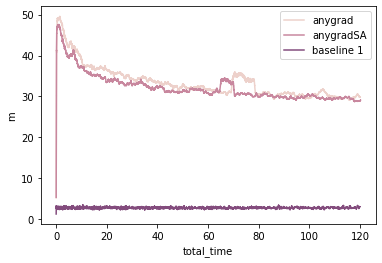

In [14]:
palette = sns.cubehelix_palette(4)
sns.lineplot(x=x_anygrad, y=y_anygrad, color=palette[0], label="anygrad")
sns.lineplot(x=x_anygrad_sa, y=y_anygrad_sa, color=palette[1], label="anygradSA")
sns.lineplot(x=x_baseline_1, y=y_baseline_1, color=palette[2], label="baseline 1")
# sns.lineplot(x=x_baseline_1000, y=y_baseline_1000, color=palette[3], label="baseline 1000")
plt.legend()
plt.show()

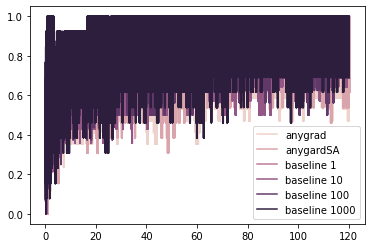

In [32]:
plt.clf()
for label, dataset in zip(labels, datasets):
    x = dataset.dropna()["M"]
    y = dataset.dropna()["value"]
    x_pp, y_pp = xy_performance_profile(x, y)
    x_plot = dataset.dropna()["total_time"]
    plt.plot(x_plot, y, label=label)
plt.legend()
plt.show()

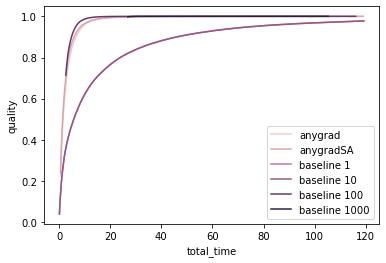

In [15]:
plt.clf()
sns.set_palette(sns.cubehelix_palette(len(labels)))
for label, dataset in zip(labels, datasets):
    dataset["value"] = (dataset["value"] - np.nanmin(dataset["value"])) / (np.nanmax(dataset["value"]) - np.nanmin(dataset["value"]))
    gd = dataset.dropna().groupby(by=["M"])
    x = gd["total_time"].max().rolling(50).mean()
    y = gd["quality"].mean().rolling(50).mean()
    # y = (y - np.min(y))
    sns.lineplot(x=x, y=y, label=label)
plt.legend()
plt.savefig(os.path.join(os.getcwd(), "figures", "performance_over_time.pdf"))
plt.show()

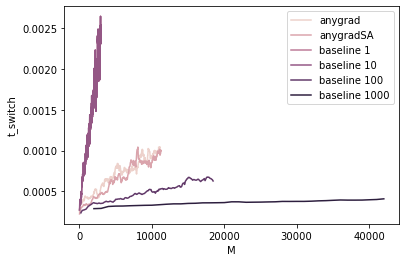

In [21]:
plt.clf()
for label, dataset in zip(labels, datasets):
    gd = dataset.dropna().groupby(by=["round"]).median()
    x = gd["M"]
    y = gd["t_switch"]
    sns.lineplot(x=x, y=y, label=label)
plt.legend()
plt.show()

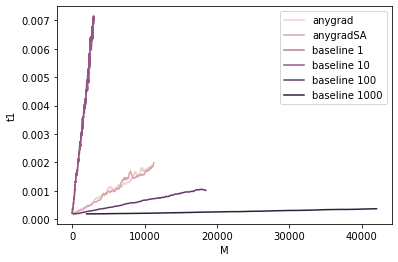

In [20]:
plt.clf()
for label, dataset in zip(labels, datasets):
    gd = dataset.dropna().groupby(by=["round"]).median()
    x = gd["M"]
    y = gd["t1"]
    sns.lineplot(x=x, y=y, label=label)
plt.legend()
plt.show()

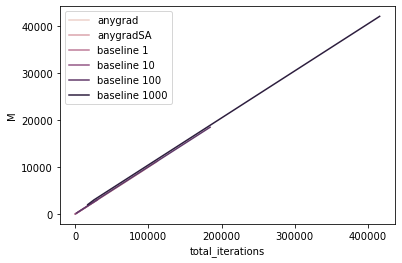

In [18]:
plt.clf()
for label, dataset in zip(labels, datasets):
    gd = dataset.dropna().groupby(by=["round"]).median()
    x = gd["total_iterations"]
    y = gd["M"]
    sns.lineplot(x=x, y=y, label=label)
plt.legend()
plt.show()